#### kaggle 竞赛入门

- 对于刚刚入门机器学习的的同学来说，kaggle竞赛通常是他们学习和跟其他的全世界范围内的参赛选手切磋的一个大的平台，这个平台上提供了一些入门的竞赛，可以供刚入门的同学一展拳脚

- 本文针对房价预测的这个竞赛展开，从EDA，特征工程，到模型调参开始讲述一些竞赛中的小的trick，希望对大家有些帮助,本人基础一般，如果有贻笑大方的地方，可以随意拍砖

#### 导入常用的数据分析以及模型的库

In [1]:
import pandas as pd
import numpy as np

- 查看当前目录下的文件可以使用！ls

In [2]:
!ls

data_description.txt
data_description.zip
kaggle house price.ipynb
sample_submission.csv
test.csv
train.csv


In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


- 数据结构类似于波士顿房屋的价格数据，其中该数据集中有79个特征，来描述房屋，可以通过数据描述来查看对应字段的意义
- 同时本文也将缺失值处理的方法进行阐述
- PoolQC           7 non-null object
- Fence            281 non-null object
- MiscFeature      54 non-null object  以上三个特征缺失较为明显，后文将有对应的对缺失值处理的方法

#### 数据处理

![处理异常值](https://ws1.sinaimg.cn/large/9ebd4c2bly1g4sv6rwu1ij20ja0cj77r.jpg)

- 异常值通常是指在预期的值之外，至于如何处理异常值，怎么界定异常值，取决于个人和特定的问题
- 对于异常值通常会在数据分布点之外，因此通常会让计算的结果和数据的分布
- 以下图为例

![](https://ws1.sinaimg.cn/large/9ebd4c2bly1g4svlxc1xzj20nr07daaq.jpg)

In [7]:
with open ('data_description.txt','r') as f:
    for i in f.readlines():
        print(i)
        break
    

MSSubClass: Identifies the type of dwelling involved in the sale.	




#### Data fields

Here's a brief version of what you'll find in the data description file.

- **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
- **MSSubClass**: The building class
- **MSZoning**: The general zoning classification
- **LotFrontage**: Linear feet of street connected to property
- **LotArea**: Lot size in square feet
- **Street**: Type of road access
- **Alley**: Type of alley access
- **LotShape**: General shape of property
- **LandContour**: Flatness of the property
- **Utilities**: Type of utilities available
- **LotConfig**: Lot configuration
- **LandSlope**: Slope of property
- **Neighborhood**: Physical locations within Ames city limits
- **Condition1**: Proximity to main road or railroad
- **Condition2**: Proximity to main road or railroad (if a second is present)
- **BldgType**: Type of dwelling
- **HouseStyle**: Style of dwelling
- **OverallQual**: Overall material and finish quality
- **OverallCond**: Overall condition rating
- **YearBuilt**: Original construction date
- **YearRemodAdd**: Remodel date
- **RoofStyle**: Type of roof
- **RoofMatl**: Roof material
- **Exterior1st**: Exterior covering on house
- **Exterior2nd**: Exterior covering on house (if more than one material)
- **MasVnrType**: Masonry veneer type
- **MasVnrArea**: Masonry veneer area in square feet
- **ExterQual**: Exterior material quality
- **ExterCond**: Present condition of the material on the exterior
- **Foundation**: Type of foundation
- **BsmtQual**: Height of the basement
- **BsmtCond**: General condition of the basement
- **BsmtExposure**: Walkout or garden level basement walls
- **BsmtFinType1**: Quality of basement finished area
- **BsmtFinSF1**: Type 1 finished square feet
- **BsmtFinType2**: Quality of second finished area (if present)
- **BsmtFinSF2**: Type 2 finished square feet
- **BsmtUnfSF**: Unfinished square feet of basement area
- **TotalBsmtSF**: Total square feet of basement area
- **Heating**: Type of heating
- **HeatingQC**: Heating quality and condition
- **CentralAir**: Central air conditioning
- **Electrical**: Electrical system
- **1stFlrSF**: First Floor square feet
- **2ndFlrSF**: Second floor square feet
- **LowQualFinSF**: Low quality finished square feet (all floors)
- **GrLivArea**: Above grade (ground) living area square feet
- **BsmtFullBath**: Basement full bathrooms
- **BsmtHalfBath**: Basement half bathrooms
- **FullBath**: Full bathrooms above grade
- **HalfBath**: Half baths above grade
- **Bedroom**: Number of bedrooms above basement level
- **Kitchen**: Number of kitchens
- **KitchenQual**: Kitchen quality
- **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
- **Functional**: Home functionality rating
- **Fireplaces**: Number of fireplaces
- **FireplaceQu**: Fireplace quality
- **GarageType**: Garage location
- **GarageYrBlt**: Year garage was built
- **GarageFinish**: Interior finish of the garage
- **GarageCars**: Size of garage in car capacity
- **GarageArea**: Size of garage in square feet
- **GarageQual**: Garage quality
- **GarageCond**: Garage condition
- **PavedDrive**: Paved driveway
- **WoodDeckSF**: Wood deck area in square feet
- **OpenPorchSF**: Open porch area in square feet
- **EnclosedPorch**: Enclosed porch area in square feet
- **3SsnPorch**: Three season porch area in square feet
- **ScreenPorch**: Screen porch area in square feet
- **PoolArea**: Pool area in square feet
- **PoolQC**: Pool quality
- **Fence**: Fence quality
- **MiscFeature**: Miscellaneous feature not covered in other categories
- **MiscVal**: $Value of miscellaneous feature
- **MoSold**: Month Sold
- **YrSold**: Year Sold
- **SaleType**: Type of sale
- **SaleCondition**: Condition of sale

- 首先看这个特征 GrLivArea: Above grade (ground) living area square feet,是指居住面积平方英尺

##### 去除异常值

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')

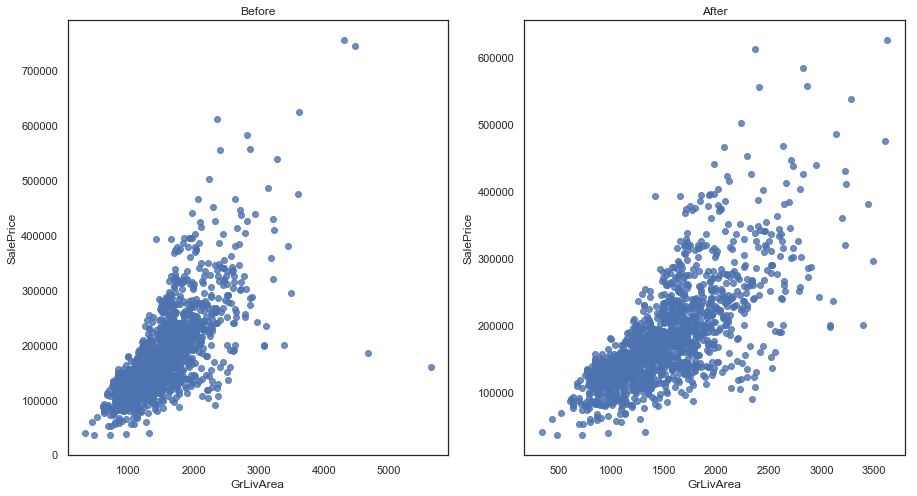

In [9]:
plt.subplots(figsize=(15,8))
plt.subplot(1,2,1)
g= sns.regplot(x=train['GrLivArea'],y= train['SalePrice'],fit_reg=False).set_title('Before')
plt.subplot(1,2,2)
train= train.drop(train[train['GrLivArea']>4000].index)
g=sns.regplot(x=train['GrLivArea'],y=train['SalePrice'],fit_reg=False).set_title('After')

* 从以上图中可以发现，居住面积大于4000的样本总共有4个，且这个四个属于严重的偏离分布

##### 处理缺失值
- 缺失值可能是由于人工输入错误，机器误差等问题导致的
- 有些例子中的缺失值可以使用0进行填充，前提是需要知道该特征代表的意义，缺失即代表0
- 实际情况中，填充0并不总是最好的办法，而且针对不同的算法，对于缺失值处理的能力不同，本文需要使用多种算法进行拟合房价，因此如何正确处理缺失值呢，一般有两种方法：
    - 直接删掉带有缺失值的列
    - 填充缺失值

In [26]:
# 首先先把训练数据与测试数据的长度保持，以备后用
ntrain = train.shape[0]
ntest = test.shape[0]

# 保持训练集的目标值数据即 SalePrice
y_train = train.SalePrice.values
all_data = pd.concat((train,test)).reset_index(drop=True)
all_data.drop(['SalePrice'],axis=1,inplace=True)
all_data.drop(['Id'],axis=1,inplace=True)
print('all data shape:{}'.format(all_data.shape))

all data shape:(2915, 79)


In [28]:
all_data_na = all_data.isnull().sum()

In [31]:
all_data_na.sort_values(ascending=False)

PoolQC           2907
MiscFeature      2810
Alley            2717
Fence            2345
FireplaceQu      1420
LotFrontage       486
GarageFinish      159
GarageQual        159
GarageYrBlt       159
GarageCond        159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
BsmtHalfBath        2
Utilities           2
Functional          2
BsmtFullBath        2
Electrical          1
Exterior2nd         1
KitchenQual         1
GarageCars          1
Exterior1st         1
GarageArea          1
TotalBsmtSF         1
                 ... 
GrLivArea           0
YearRemodAdd        0
YearBuilt           0
WoodDeckSF          0
TotRmsAbvGrd        0
Street              0
ScreenPorch         0
SaleCondition       0
RoofStyle           0
RoofMatl            0
PoolArea            0
PavedDrive          0
OverallQual         0
OverallCond         0
OpenPorchS

In [32]:
all_data_na = all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)

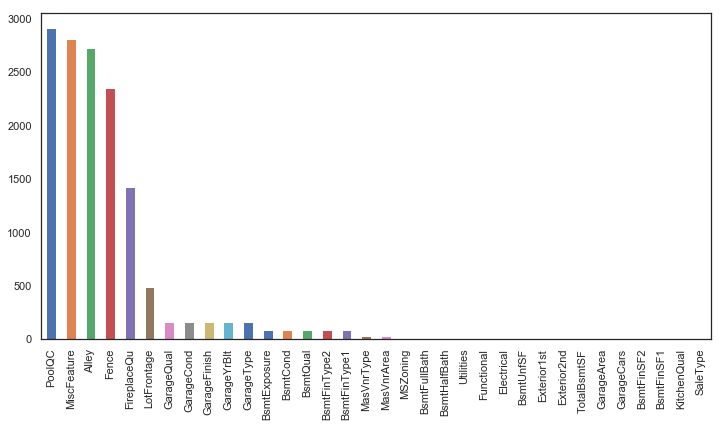

In [33]:
plt.subplots(figsize=(12,6))
all_data_na.plot(kind='Bar')

- [参考链接](https://www.kaggle.com/agodwinp/stacking-house-prices-walkthrough-to-top-5)